In [1]:
# -*- coding: utf-8 -*-
# Licensed under a 3-clause BSD style license - see LICENSE.rst
import logging
import os
import warnings
from collections import OrderedDict
from multiprocessing import Pool

import astropy
from astropy.table import Table, hstack
import astropy.units as u
from astropy.io import ascii
from astropy.constants import alpha, c, e, hbar, m_e, m_p, sigma_sb
from astropy.utils.data import get_pkg_data_filename
from astropy.cosmology import WMAP9 as cosmo

import numpy as np
import matplotlib.pyplot as plt

from Validator import (
    validate_array,
    validate_physical_type,
    validate_scalar,
)
#from .model_utils import memoize
from Utils import trapz_loglog

import Models
import Radiative
import grbloader
from GRBmodel import GRBModel1
from Models import EblAbsorptionModel

from astropy.units import def_physical_type

try:
    #def_physical_type(u.Unit("1 / eV"), "differential energy")
    def_physical_type(u.erg / u.cm**2 / u.s, "flux")
    def_physical_type(u.Unit("1/(s cm2 erg)"), "differential flux")
    def_physical_type(u.Unit("1/(s erg)"), "differential power")
    def_physical_type(u.Unit("1/TeV"), "differential energy")
    def_physical_type(u.Unit("1/cm3"), "number density")
    def_physical_type(u.Unit("1/(eV cm3)"), "differential number density")

except ValueError:
    print("New quantities already defined")

New quantities already defined


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

In [ ]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

#Criando uma função periodica
def PS(x, y, t):
    return np.sin(y**2 + t) + np.cos(x**2 + t)

#Dados para aplicar na função 
x = np.linspace(-np.pi, np.pi, 101)
y = np.linspace(-np.pi, np.pi, 101)
t = np.linspace(0, 20, 101)

#Cria matrizes de coordenadas a partir das coords x e y
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize = (12, 6), dpi = 100)     
ax = fig.gca(projection = '3d')

#Esta função é chamada periodicamente a partir da FuncAnimation
def update(i):
    Z = PS(X, Y, t[i])
    ax.clear()
    ax.plot_surface(X, Y, Z, cmap = mpl.cm.viridis)
    plt.title(str(i))
    plt.xlabel('$X$', color = 'g')
    plt.ylabel('$Y$', color = 'g')

#Plotagem para chamar a função update() periodicamente
ani = animation.FuncAnimation(fig, update, np.arange(100), interval = 10, repeat = False)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parametri della sfera
raggio = 1.0
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = raggio * np.outer(np.cos(u), np.sin(v))
y = raggio * np.outer(np.sin(u), np.sin(v))
z = raggio * np.outer(np.ones(np.size(u)), np.cos(v))

# Crea la figura 3D
fig = plt.figure(figsize = (12, 6), dpi = 100)
ax = fig.add_subplot(111, projection='3d')

# Plot della sfera
ax.plot_surface(x, y, z, color='red', alpha=0.6, edgecolor='none')

# Imposta i limiti degli assi
ax.set_xlim([-raggio, raggio])
ax.set_ylim([-raggio, raggio])
ax.set_zlim([-raggio, raggio])

# Imposta il punto di vista (elevazione e azimuth)
ax.view_init(elev=30, azim=70)  # Cambia questi valori per cambiare prospettiva

plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

# Parametri
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # esempio: r(t) = 0.5 + 0.5 * t

filenames = []

for i, (t, raggio) in enumerate(zip(times, radii)):
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('white')

    # Griglia sferica
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = raggio * np.outer(np.cos(u), np.sin(v))
    y = raggio * np.outer(np.sin(u), np.sin(v))
    z = raggio * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, color='red', alpha=0.6, edgecolor='none')


    # Etichette testo
    ax.text2D(0.05, 0.95, f"t = {t:.2f} s", transform=ax.transAxes)
    ax.text2D(0.05, 0.90, f"R = {raggio:.2f} cm", transform=ax.transAxes)

    # Limiti assi
    limit = max(radii) * 1.1
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])

    # Vista fissa (puoi cambiarla)
    ax.view_init(elev=30, azim=60)

    # Rimuovi gli assi visivi se vuoi un look più pulito
    # ax.axis('off')

    filename = f"frame_{i:03d}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Crea la GIF
with imageio.get_writer("sfera_espansione.gif", mode="I", duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Pulisci i file temporanei (opzionale)
import os
for filename in filenames:
    os.remove(filename)


/home/tobiazenbook/mambaforge/envs/grbmodel/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


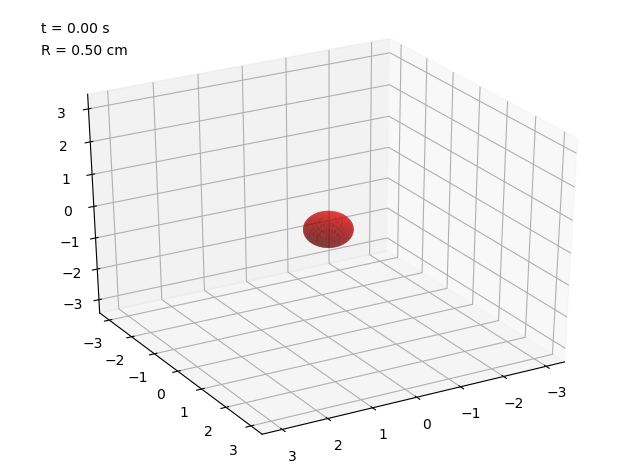

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D

# Parametri
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # esempio: r(t) = 0.5 + 0.5 * t

# Crea la figura e l'asse 3D
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Limiti assi
limit = max(radii) * 1.1
ax.set_xlim([-limit, limit])
ax.set_ylim([-limit, limit])
ax.set_zlim([-limit, limit])

# Vista fissa
ax.view_init(elev=30, azim=60)

# Funzione di aggiornamento per l'animazione
def update(frame):
    ax.cla()  # Pulisce l'asse per il nuovo frame

    # Parametri per il frame corrente
    t = times[frame]
    raggio = radii[frame]

    # Griglia sferica
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = raggio * np.outer(np.cos(u), np.sin(v))
    y = raggio * np.outer(np.sin(u), np.sin(v))
    z = raggio * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot della sfera
    ax.plot_surface(x, y, z, color='red', alpha=0.6, edgecolor='none')

    # Etichette testo
    ax.text2D(0.05, 0.95, f"t = {t:.2f} s", transform=ax.transAxes)
    ax.text2D(0.05, 0.90, f"R = {raggio:.2f} cm", transform=ax.transAxes)

    # Limiti assi
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])

    # Vista fissa
    ax.view_init(elev=30, azim=60)

# Crea l'animazione
ani = FuncAnimation(fig, update, frames=frames, repeat=False)

# Salva l'animazione come GIF
ani.save("sfera_espansione.gif", writer=PillowWriter(fps=10))


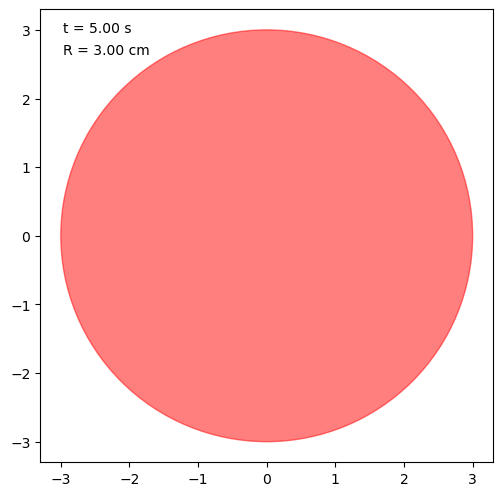

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parametri temporali
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # r(t)

# Crea la figura 2D
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.set_aspect('equal')
limit = max(radii) * 1.1
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)

# Oggetti grafici da aggiornare
circle = plt.Circle((0, 0), radii[0], color='red', alpha=0.5)
ax.add_patch(circle)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)
radius_text = ax.text(0.05, 0.90, '', transform=ax.transAxes)

# Funzione di aggiornamento
def update(frame):
    r = radii[frame]
    circle.set_radius(r)
    time_text.set_text(f't = {times[frame]:.2f} s')
    radius_text.set_text(f'R = {r:.2f} cm')
    return circle, time_text, radius_text

# Crea animazione
ani = FuncAnimation(fig, update, frames=frames, blit=True)
ani.save("sezione_equatoriale.gif", writer=PillowWriter(fps=10))


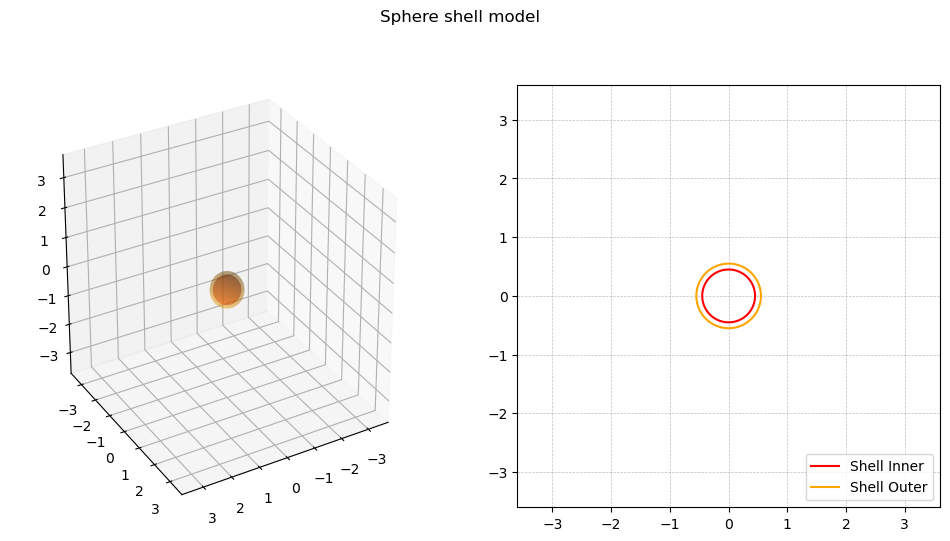

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Parametri temporali
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # r(t)

# Crea la figura
fig = plt.figure(figsize=(12, 6), dpi=100)
fig.suptitle("Sphere shell model")

# 3D subplot
ax3d = fig.add_subplot(121, projection='3d')
ax3d.set_facecolor('white')
ax3d.view_init(elev=30, azim=60)
ax3d.set_xlabel("X (cm)")
ax3d.set_ylabel("Y (cm)")
ax3d.set_zlabel("Z (cm)")

# 2D subplot per sezioni
ax2d = fig.add_subplot(122)
ax2d.set_aspect('equal')
ax2d.set_xlabel("X (cm)")
ax2d.set_ylabel("Y (cm)")

limit = max(radii) * 1.2
for ax in [ax3d, ax2d]:
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
if hasattr(ax3d, "set_zlim"):  # just in case
    ax3d.set_zlim(-limit, limit)

# Precompute sfera
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, np.pi, 30)
U, V = np.meshgrid(u, v)
X = np.cos(U) * np.sin(V)
Y = np.sin(U) * np.sin(V)
Z = np.cos(V)

# Griglie polar coordinate per sezioni
theta = np.linspace(0, 2 * np.pi, 100)
grid_r = np.linspace(0, 1.0, 5)

# Cerchi iniziali sezioni
circle_xy, = ax2d.plot([], [], 'r', lw=2, label='XY (Z=0)')
circle_xz, = ax2d.plot([], [], 'b--', lw=1, label='XZ (Y=0)')
circle_yz, = ax2d.plot([], [], 'g--', lw=1, label='YZ (X=0)')

# Testo
time_text = ax2d.text(0.05, 0.95, '', transform=ax2d.transAxes)
radius_text = ax2d.text(0.05, 0.90, '', transform=ax2d.transAxes)

def update(frame):
    r = radii[frame]
    delta_r = 0.2 * r  # ad esempio 20% dello spessore
    r_in = r - delta_r / 2
    r_out = r + delta_r / 2

    # === Shell 3D ===
    ax3d.cla()
    ax3d.set_xlim(-limit, limit)
    ax3d.set_ylim(-limit, limit)
    ax3d.set_zlim(-limit, limit)
    ax3d.view_init(elev=30, azim=60)

    # Superfici interna ed esterna della shell
    ax3d.plot_surface(r_in * X, r_in * Y, r_in * Z, color='red', alpha=0.3, edgecolor='none')
    ax3d.plot_surface(r_out * X, r_out * Y, r_out * Z, color='orange', alpha=0.3, edgecolor='none')

    # === Sezione 2D ===
    ax2d.cla()
    ax2d.set_xlim(-limit, limit)
    ax2d.set_ylim(-limit, limit)
    ax2d.set_aspect('equal')
    ax2d.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Due cerchi concentrici per la shell
    ax2d.plot(r_in * np.cos(theta), r_in * np.sin(theta), 'r', lw=1.5, label='Shell Inner')
    ax2d.plot(r_out * np.cos(theta), r_out * np.sin(theta), 'orange', lw=1.5, label='Shell Outer')

    time_text.set_text(f't = {times[frame]:.2f} s')
    radius_text.set_text(f'R = {r:.2f} cm')
    ax2d.legend(loc='lower right')

    return []

# Crea animazione
ani = FuncAnimation(fig, update, frames=frames, blit=False)
ani.save("espansione_sfera_con_sezioni.gif", writer=PillowWriter(fps=10))


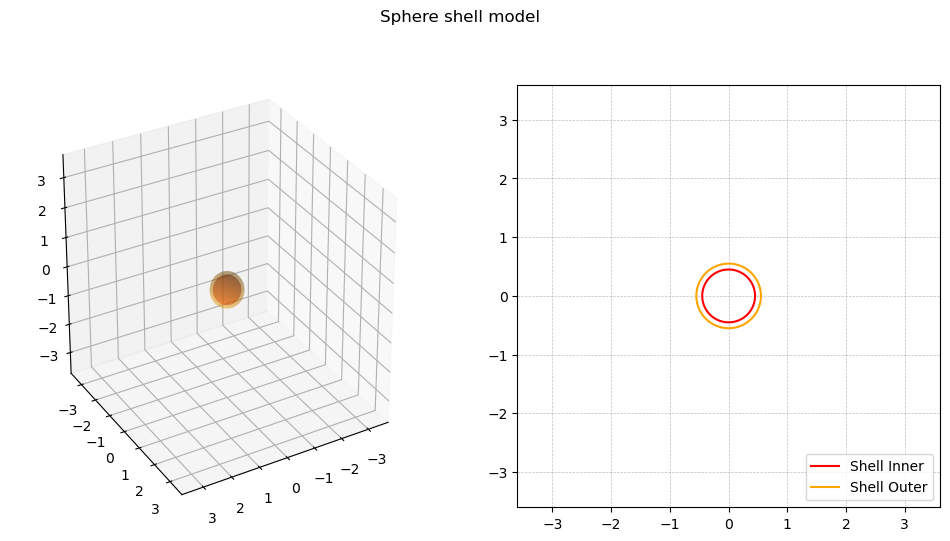

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

# Parametri
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # esempio: r(t) = 0.5 + 0.5 * t

filenames = []

# Crea una nuova figura con 3 subplot (3D + 2D + grafico del raggio)import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Parametri temporali
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # r(t)

# Crea la figura
fig = plt.figure(figsize=(12, 6), dpi=100)
fig.suptitle("Sphere shell model")

# 3D subplot
ax3d = fig.add_subplot(121, projection='3d')
ax3d.set_facecolor('white')
ax3d.view_init(elev=30, azim=60)
ax3d.set_xlabel("X (cm)")
ax3d.set_ylabel("Y (cm)")
ax3d.set_zlabel("Z (cm)")

# 2D subplot per sezioni
ax2d = fig.add_subplot(122)
ax2d.set_aspect('equal')
ax2d.set_xlabel("X (cm)")
ax2d.set_ylabel("Y (cm)")

limit = max(radii) * 1.2
for ax in [ax3d, ax2d]:
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
if hasattr(ax3d, "set_zlim"):  # just in case
    ax3d.set_zlim(-limit, limit)

# Precompute sfera
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, np.pi, 30)
U, V = np.meshgrid(u, v)
X = np.cos(U) * np.sin(V)
Y = np.sin(U) * np.sin(V)
Z = np.cos(V)

# Griglie polar coordinate per sezioni
theta = np.linspace(0, 2 * np.pi, 100)
grid_r = np.linspace(0, 1.0, 5)

# Cerchi iniziali sezioni
circle_xy, = ax2d.plot([], [], 'r', lw=2, label='XY (Z=0)')
circle_xz, = ax2d.plot([], [], 'b--', lw=1, label='XZ (Y=0)')
circle_yz, = ax2d.plot([], [], 'g--', lw=1, label='YZ (X=0)')

# Testo
time_text = ax2d.text(0.05, 0.95, '', transform=ax2d.transAxes)
radius_text = ax2d.text(0.05, 0.90, '', transform=ax2d.transAxes)

def update(frame):
    r = radii[frame]
    delta_r = 0.2 * r  # ad esempio 20% dello spessore
    r_in = r - delta_r / 2
    r_out = r + delta_r / 2

    # === Shell 3D ===
    ax3d.cla()
    ax3d.set_xlim(-limit, limit)
    ax3d.set_ylim(-limit, limit)
    ax3d.set_zlim(-limit, limit)
    ax3d.view_init(elev=30, azim=60)

    # Superfici interna ed esterna della shell
    ax3d.plot_surface(r_in * X, r_in * Y, r_in * Z, color='red', alpha=0.3, edgecolor='none')
    ax3d.plot_surface(r_out * X, r_out * Y, r_out * Z, color='orange', alpha=0.3, edgecolor='none')

    # === Sezione 2D ===
    ax2d.cla()
    ax2d.set_xlim(-limit, limit)
    ax2d.set_ylim(-limit, limit)
    ax2d.set_aspect('equal')
    ax2d.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Due cerchi concentrici per la shell
    ax2d.plot(r_in * np.cos(theta), r_in * np.sin(theta), 'r', lw=1.5, label='Shell Inner')
    ax2d.plot(r_out * np.cos(theta), r_out * np.sin(theta), 'orange', lw=1.5, label='Shell Outer')

    time_text.set_text(f't = {times[frame]:.2f} s')
    radius_text.set_text(f'R = {r:.2f} cm')
    ax2d.legend(loc='lower right')

    return []

# Crea animazione
ani = FuncAnimation(fig, update, frames=frames, blit=False)
ani.save("espansione_sfera_con_sezioni.gif", writer=PillowWriter(fps=10))



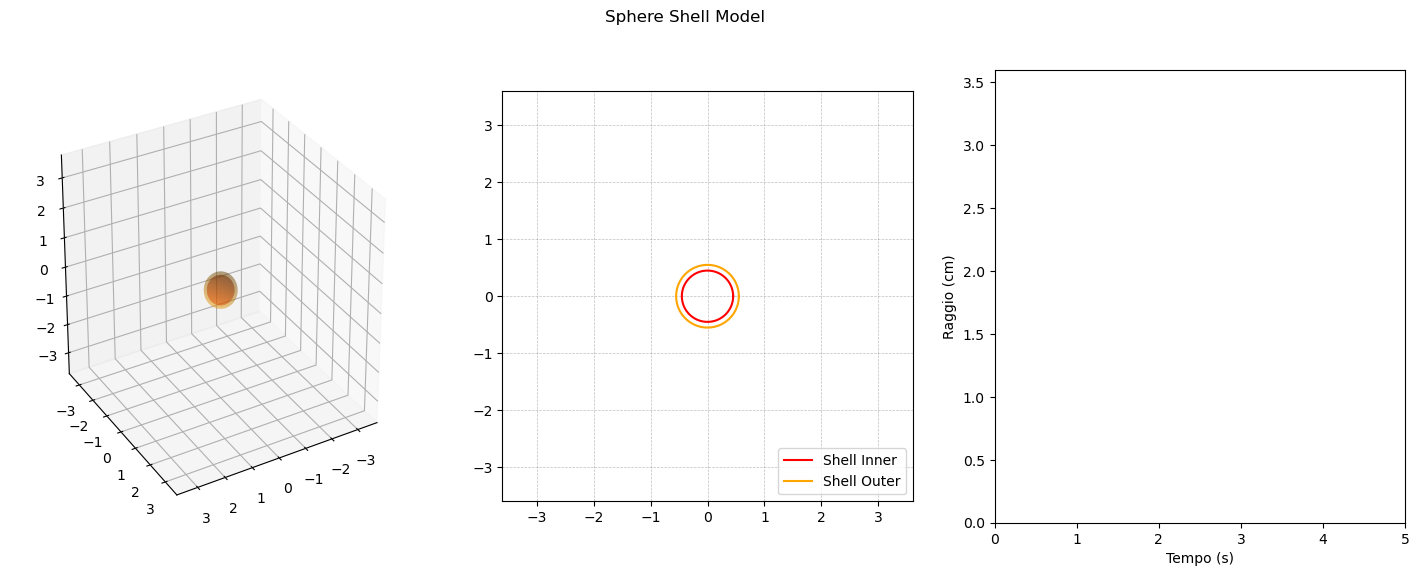

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

#------------------- temporal contarints -------------------------
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # r(t)
#-------------------------------------------------------------------

fig = plt.figure(figsize=(18, 6), dpi=100)
fig.suptitle("Sphere Shell Model")

# 3D subplot
ax3d = fig.add_subplot(131, projection='3d')
ax3d.set_facecolor('white')
ax3d.view_init(elev=30, azim=60)
ax3d.set_xlabel("X (cm)")
ax3d.set_ylabel("Y (cm)")
ax3d.set_zlabel("Z (cm)")

# 2D subplot per sezioni
ax2d = fig.add_subplot(132)
ax2d.set_aspect('equal')
ax2d.set_xlabel("X (cm)")
ax2d.set_ylabel("Y (cm)")

# 2D subplot per grafico raggio vs tempo
ax_raggio = fig.add_subplot(133)
ax_raggio.set_xlim([t_start, t_end])
ax_raggio.set_ylim([0, max(radii)*1.2])
ax_raggio.set_xlabel("Tempo (s)")
ax_raggio.set_ylabel("Raggio (cm)")

# Limiti comuni per i grafici
limit = max(radii) * 1.2
for ax in [ax3d, ax2d]:
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
if hasattr(ax3d, "set_zlim"):  # just in case
    ax3d.set_zlim(-limit, limit)

# Precompute sfera
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, np.pi, 30)
U, V = np.meshgrid(u, v)
X = np.cos(U) * np.sin(V)
Y = np.sin(U) * np.sin(V)
Z = np.cos(V)

# Griglie polar coordinate per sezioni
theta = np.linspace(0, 2 * np.pi, 100)
grid_r = np.linspace(0, 1.0, 5)

# Cerchi iniziali sezioni
circle_xy, = ax2d.plot([], [], 'r', lw=2, label='XY (Z=0)')
circle_xz, = ax2d.plot([], [], 'b--', lw=1, label='XZ (Y=0)')
circle_yz, = ax2d.plot([], [], 'g--', lw=1, label='YZ (X=0)')

# Testo per il tempo e il raggio
time_text = ax2d.text(0.05, 0.95, '', transform=ax2d.transAxes)
radius_text = ax2d.text(0.05, 0.90, '', transform=ax2d.transAxes)

# Linea per il grafico del raggio
line_raggio, = ax_raggio.plot([], [], color='blue', lw=2)

# Funzione di aggiornamento
def update(frame):
    r = radii[frame]
    delta_r = 0.2 * r  # ad esempio 20% dello spessore
    r_in = r - delta_r / 2
    r_out = r + delta_r / 2

    # === Shell 3D ===
    ax3d.cla()
    ax3d.set_xlim(-limit, limit)
    ax3d.set_ylim(-limit, limit)
    ax3d.set_zlim(-limit, limit)
    ax3d.view_init(elev=30, azim=60)

    # Superfici interna ed esterna della shell
    ax3d.plot_surface(r_in * X, r_in * Y, r_in * Z, color='red', alpha=0.3, edgecolor='none')
    ax3d.plot_surface(r_out * X, r_out * Y, r_out * Z, color='orange', alpha=0.3, edgecolor='none')

    # === Sezione 2D ===
    ax2d.cla()
    ax2d.set_xlim(-limit, limit)
    ax2d.set_ylim(-limit, limit)
    ax2d.set_aspect('equal')
    ax2d.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Due cerchi concentrici per la shell
    ax2d.plot(r_in * np.cos(theta), r_in * np.sin(theta), 'r', lw=1.5, label='Shell Inner')
    ax2d.plot(r_out * np.cos(theta), r_out * np.sin(theta), 'orange', lw=1.5, label='Shell Outer')

    # === Grafico raggio vs tempo ===
    line_raggio.set_data(times[:frame+1], radii[:frame+1])

    # Aggiorna il testo per il tempo e il raggio
    time_text.set_text(f't = {times[frame]:.2f} s')
    radius_text.set_text(f'R = {r:.2f} cm')
    ax2d.legend(loc='lower right')

    return [circle_xy, line_raggio]

# Crea animazione
ani = FuncAnimation(fig, update, frames=frames, blit=False)
ani.save("espansione_sfera_con_sezioni_e_raggio.gif", writer=PillowWriter(fps=10))


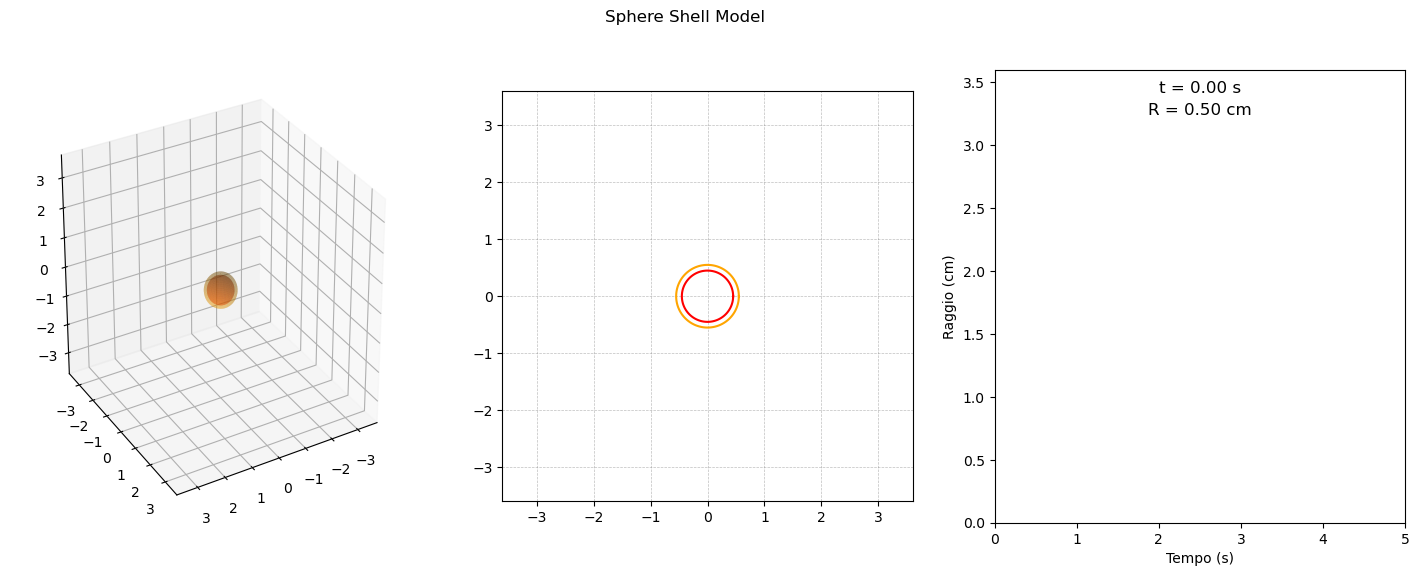

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

#------------------- temporal constraints -------------------------
t_start = 0
t_end = 5
frames = 50
times = np.linspace(t_start, t_end, frames)
radii = 0.5 + 0.5 * times  # r(t)
#-------------------------------------------------------------------

fig = plt.figure(figsize=(18, 6), dpi=100)
fig.suptitle("Sphere Shell Model")

# 3D subplot
ax3d = fig.add_subplot(131, projection='3d')
ax3d.set_facecolor('white')
ax3d.view_init(elev=30, azim=60)
ax3d.set_xlabel("X (cm)")
ax3d.set_ylabel("Y (cm)")
ax3d.set_zlabel("Z (cm)")

# 2D subplot per sezioni
ax2d = fig.add_subplot(132)
ax2d.set_aspect('equal')
ax2d.set_xlabel("X (cm)")
ax2d.set_ylabel("Y (cm)")

# 2D subplot per grafico raggio vs tempo
ax_raggio = fig.add_subplot(133)
ax_raggio.set_xlim([t_start, t_end])
ax_raggio.set_ylim([0, max(radii)*1.2])
ax_raggio.set_xlabel("Tempo (s)")
ax_raggio.set_ylabel("Raggio (cm)")

# Limiti comuni per i grafici
limit = max(radii) * 1.2
for ax in [ax3d, ax2d]:
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
if hasattr(ax3d, "set_zlim"):  # just in case
    ax3d.set_zlim(-limit, limit)

# Precompute sfera
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, np.pi, 30)
U, V = np.meshgrid(u, v)
X = np.cos(U) * np.sin(V)
Y = np.sin(U) * np.sin(V)
Z = np.cos(V)

# Griglie polar coordinate per sezioni
theta = np.linspace(0, 2 * np.pi, 100)
grid_r = np.linspace(0, 1.0, 5)

# Cerchi iniziali sezioni
circle_xy, = ax2d.plot([], [], 'r', lw=2, label='XY (Z=0)')
circle_xz, = ax2d.plot([], [], 'b--', lw=1, label='XZ (Y=0)')
circle_yz, = ax2d.plot([], [], 'g--', lw=1, label='YZ (X=0)')

# Linea per il grafico del raggio
line_raggio, = ax_raggio.plot([], [], color='blue', lw=2)

# Variabili globali per il testo
time_text = None
radius_text = None

# Funzione di aggiornamento
def update(frame):
    global time_text, radius_text
    
    r = radii[frame]
    delta_r = 0.2 * r  # ad esempio 20% dello spessore
    r_in = r - delta_r / 2
    r_out = r + delta_r / 2

    # === Shell 3D ===
    ax3d.cla()
    ax3d.set_xlim(-limit, limit)
    ax3d.set_ylim(-limit, limit)
    ax3d.set_zlim(-limit, limit)
    ax3d.view_init(elev=30, azim=60)

    # Superfici interna ed esterna della shell
    ax3d.plot_surface(r_in * X, r_in * Y, r_in * Z, color='red', alpha=0.3, edgecolor='none')
    ax3d.plot_surface(r_out * X, r_out * Y, r_out * Z, color='orange', alpha=0.3, edgecolor='none')

    # === Sezione 2D ===
    ax2d.cla()
    ax2d.set_xlim(-limit, limit)
    ax2d.set_ylim(-limit, limit)
    ax2d.set_aspect('equal')
    ax2d.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Due cerchi concentrici per la shell
    ax2d.plot(r_in * np.cos(theta), r_in * np.sin(theta), 'r', lw=1.5, label='Shell Inner')
    ax2d.plot(r_out * np.cos(theta), r_out * np.sin(theta), 'orange', lw=1.5, label='Shell Outer')

    # === Grafico raggio vs tempo ===
    line_raggio.set_data(times[:frame+1], radii[:frame+1])

    # Rimuovere il testo precedente, se esiste
    if time_text is not None:
        time_text.remove()
    if radius_text is not None:
        radius_text.remove()

    # Aggiungere il nuovo testo nel grafico raggio vs tempo
    time_text = ax_raggio.text(0.5, 0.95, f't = {times[frame]:.2f} s', transform=ax_raggio.transAxes, ha='center', fontsize=12, color='black')
    radius_text = ax_raggio.text(0.5, 0.90, f'R = {r:.2f} cm', transform=ax_raggio.transAxes, ha='center', fontsize=12, color='black')

    return [line_raggio]

# Crea animazione
ani = FuncAnimation(fig, update, frames=frames, blit=False)
ani.save("espansione_sfera_con_sezioni_e_raggio.gif", writer=PillowWriter(fps=10))
